# Home Sale Price Analysis in Ames, Iowa

***

### Aim of the project

To find out what drives the price of a house. Is it the neighborhood? The size of the house? The amenities? Or something else? <br>
Given are 2 Datasets (Train and test) for the city of Ames, Iowa, USA

***

### Import Modules

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline



## Data Dictionary 

<details><summary>Ames Data Description</summary>
    
- [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
</details>

***

### Read the data 

In [4]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [7]:
pd.set_option('display.max_columns', 100)    
#source:https://datascienceparichay.com/article/show-all-columns-of-pandas-dataframe-in-jupyter-notebook/
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [ ]:
test.head()

In [8]:
train.shape,test.shape

((2051, 81), (878, 80))

## Getting familiar with the datasets with EDA 

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [10]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


### Missing data 

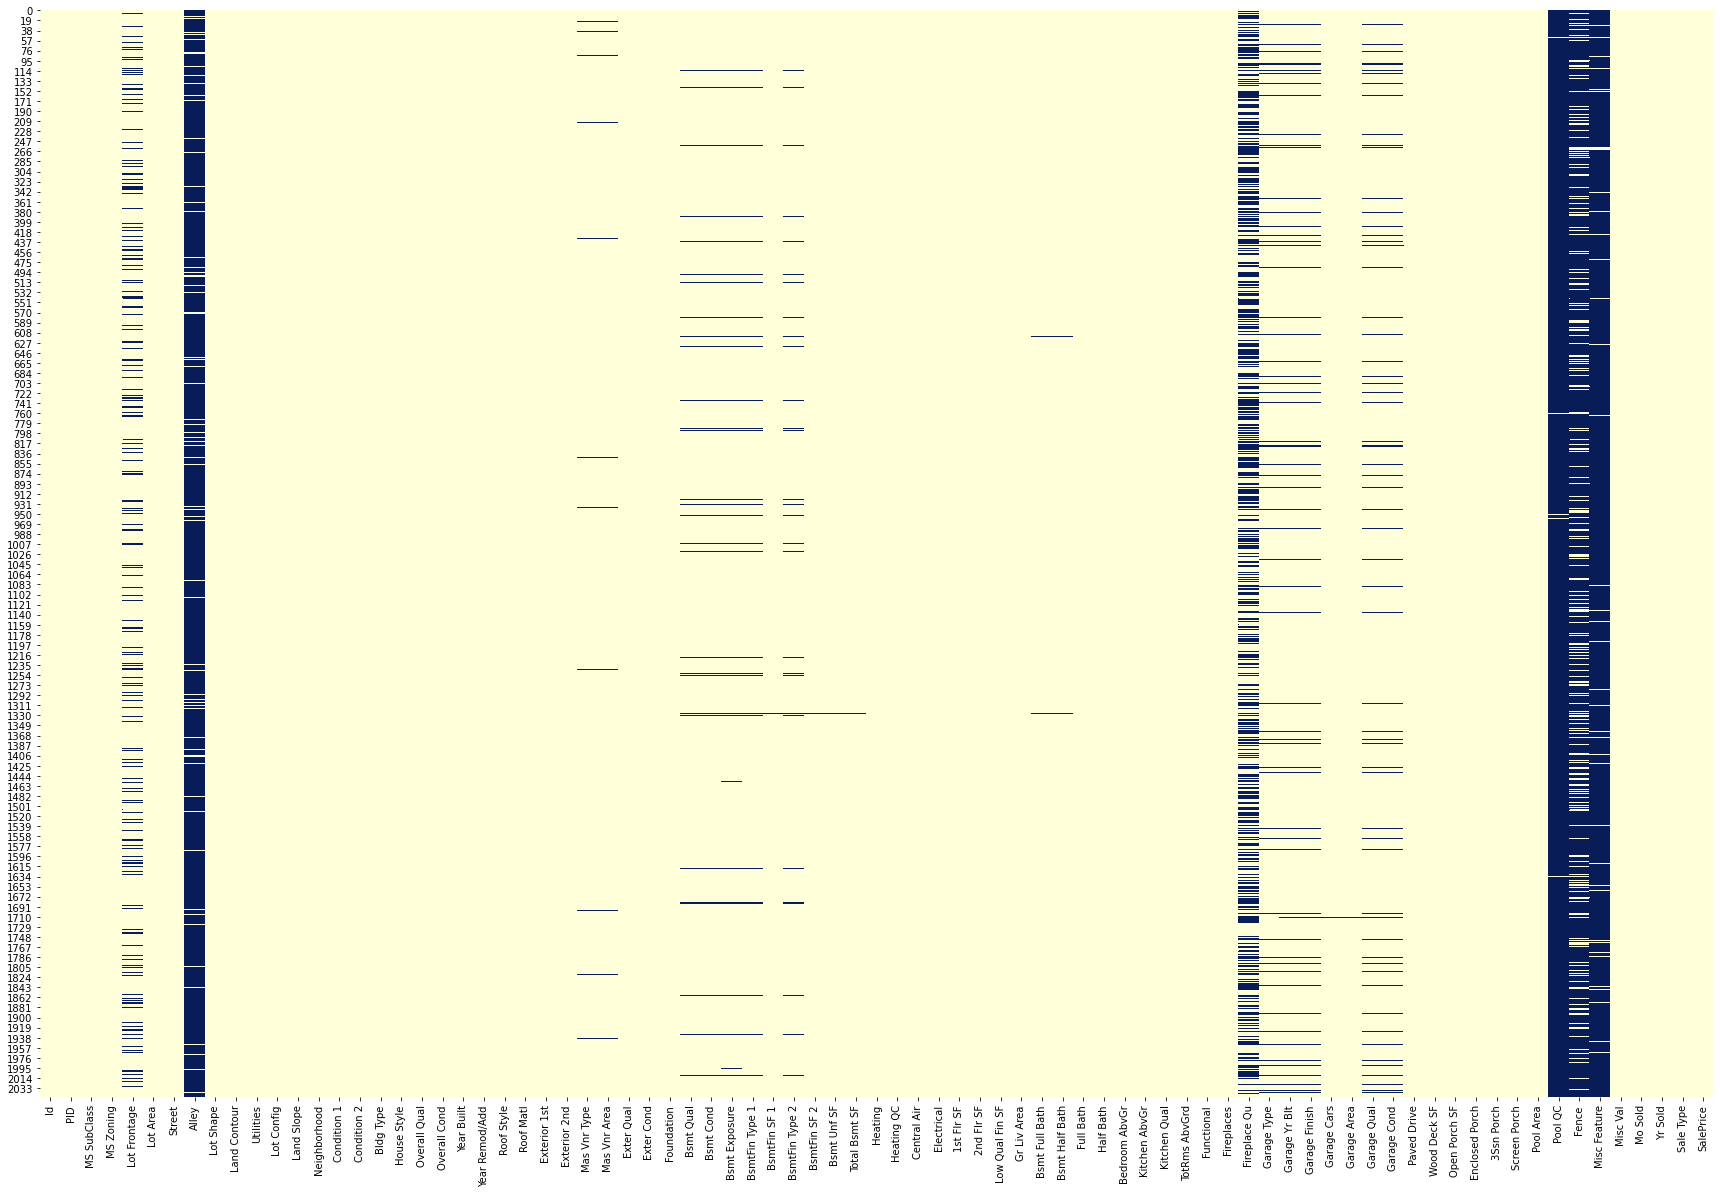

In [11]:
# We will use the Seaborn's Heatmap to visialize th emissing data in each variable.
# source: https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/

plt.figure(figsize=(30,20))
sns.heatmap(train.isna(),
            cmap="YlGnBu",
            cbar = False)
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

We can see from the heatmap, the horizontal bars corresponding to each column are the missing data for that row. Here Alley, Pool QC, Fence and Misc Feature have the most missing values.

In [12]:
# List of all null values from the Train dataset

train_null = train.isnull().sum()
train_null_filtered = train_null[train_null > 0]
print(train_null_filtered)

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64


In [13]:
 # percentage missing values in the Train dataset:

print((train_null_filtered/train.shape[0])*100)

Lot Frontage      16.089712
Alley             93.174061
Mas Vnr Type       1.072647
Mas Vnr Area       1.072647
Bsmt Qual          2.681619
Bsmt Cond          2.681619
Bsmt Exposure      2.827889
BsmtFin Type 1     2.681619
BsmtFin SF 1       0.048757
BsmtFin Type 2     2.730375
BsmtFin SF 2       0.048757
Bsmt Unf SF        0.048757
Total Bsmt SF      0.048757
Bsmt Full Bath     0.097513
Bsmt Half Bath     0.097513
Fireplace Qu      48.756704
Garage Type        5.509508
Garage Yr Blt      5.558264
Garage Finish      5.558264
Garage Cars        0.048757
Garage Area        0.048757
Garage Qual        5.558264
Garage Cond        5.558264
Pool QC           99.561190
Fence             80.497318
Misc Feature      96.830814
dtype: float64


In [14]:
# listing all the variable that are not float or int in the Train dataset

train_object = train.dtypes
train_object_filtered = train_object[train_object == 'object']
print(train_object_filtered)

MS Zoning         object
Street            object
Alley             object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Exter Qual        object
Exter Cond        object
Foundation        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating           object
Heating QC        object
Central Air       object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Pool QC           object
Fence             object


## Data Cleaning

In [15]:
# Converting all th 'NA's in the dataframe to NaN values

train = train.replace(['NA', ''], np.NaN)

###  Dropping those variables with more than 90% null values


In [16]:
# Alley, Pool QC, Misc Feature have more than 90% missing data

train.drop(['Alley', 'Pool QC', 'Misc Feature'], axis=1, inplace=True)
train.shape

(2051, 78)

### Dropping the rows that correspond to commercial, industrial and agricultural zonings under MS Zoning

In [17]:
# Take a look at the MS Zoning column
train['MS Zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [18]:
# Delete all data where MS Zoning is commercial, industrial and agricultural since we are dealing with only residential

train = train[(train['MS Zoning'] != 'C (all)' ) & 
              (train['MS Zoning'] != 'A (agr)' ) & 
              (train['MS Zoning'] != 'I (all)' )]


In [19]:
train['MS Zoning'].unique()

array(['RL', 'RM', 'FV', 'RH'], dtype=object)

In [20]:
train.shape

(2029, 78)

### Spell check to match the values in the data dictionary.

In [21]:
dict_dtypes = dict(train.dtypes)
for k, v in dict_dtypes.items():
    if v == 'object':
        print(k + ':' , train[k].unique())
    else:
        pass


MS Zoning: ['RL' 'RM' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Lot Shape: ['IR1' 'Reg' 'IR2' 'IR3']
Land Contour: ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities: ['AllPub' 'NoSeWa']
Lot Config: ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
Land Slope: ['Gtl' 'Sev' 'Mod']
Neighborhood: ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr' 'Blmngtn'
 'IDOTRR' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
Condition 1: ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
Condition 2: ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
Bldg Type: ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
House Style: ['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
Roof Style: ['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
Roof Matl: ['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']
Exterior 1st: ['HdBoard' 'Viny

We are trying to make the values similar throughout the dataset wherever applicable, for instance:
- Exterior 1st: ['HdBoard' 'VinylSd' 'Wd Sdng' 'BrkFace' 'Plywood' 'MetalSd' 'AsbShng'
 'CemntBd' 'WdShing' 'Stucco' 'BrkComm' 'Stone' 'ImStucc' 'CBlock'
 'AsphShn']
- Exterior 2nd: ['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'CmentBd'
 'Wd Shng' 'BrkFace' 'Stucco' 'Brk Cmn' 'ImStucc' 'Stone' 'CBlock'
 'AsphShn']
 
Looking at the unique value for the above 2 columns, we found that the unique values are the same with slight discrepencies in spelling. Like:Exterior 1st: 'WdShing' and Exterior 2nd: ''Wd Shng''  We will change them to match the data dictionary, because they are the same materials and should have the same names.

In [22]:
train['Neighborhood'] = train['Neighborhood'].replace(to_replace = 'NAmes', value = 'Names')
train['Bldg Type'] = train['Bldg Type'].replace(to_replace = '2fmCon', value = '2FmCon')
train['Bldg Type'] = train['Bldg Type'].replace(to_replace = 'Duplex', value = 'Duplx')
train['Bldg Type'] = train['Bldg Type'].replace(to_replace = 'Twnhs', value = 'TwnhsI')
train['Exterior 2nd'] = train['Exterior 2nd'].replace(to_replace = 'CmentBd', value = 'CemntBd')
train['Exterior 2nd'] = train['Exterior 2nd'].replace(to_replace = 'Wd Shng', value = 'WdShing')
train['Exterior 2nd'] = train['Exterior 2nd'].replace(to_replace = 'Brk Cmn', value = 'BrkComm')
train['Sale Type'] = train['Sale Type'].replace(to_replace = 'WD ', value = 'WD')


In [23]:
train['Bldg Type'].unique()

array(['1Fam', 'TwnhsE', 'TwnhsI', '2FmCon', 'Duplx'], dtype=object)

### Lot Frontage missing values
Take a look at the Lot Frontage (Linear feet of street connected to pro perty) null- values. 
there are about 1721 non-null values. 

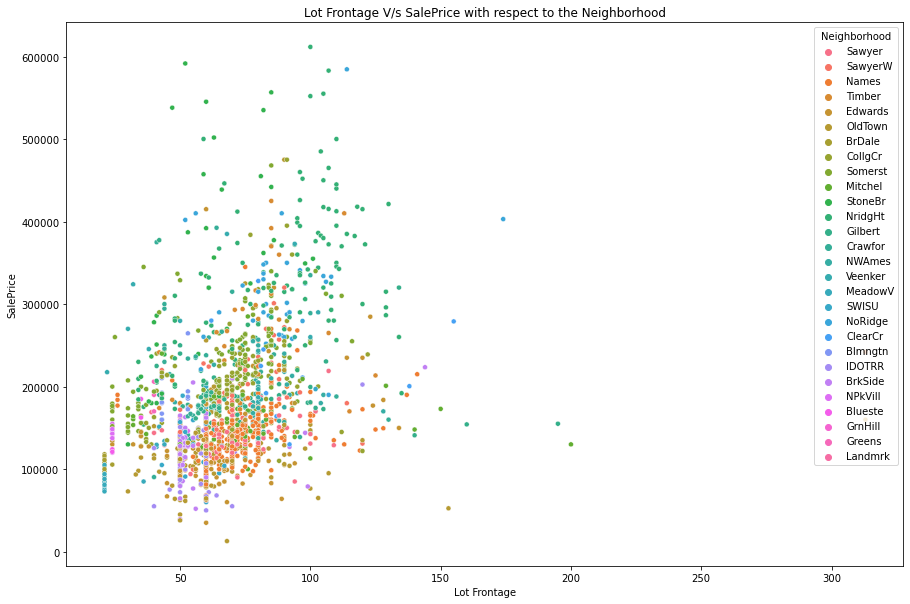

In [24]:
# Scatterplot of Lot Frontage V/s SalePrice with respect to the Neighborhood
plt.figure(figsize = (15,10))
plt.title('Lot Frontage V/s SalePrice with respect to the Neighborhood')
sns.scatterplot(x = 'Lot Frontage', y = 'SalePrice', hue = 'Neighborhood', s=25, data = train);


#### We can see that the Lot Frontage has a relation to neighborhoods and SalePrice in that neighborhood. 
We cannot add 0 values here since it is unlikely that the houses have no street connection. 
Therefore we will impute missing values here by using the median values for the respected neighborhoods that house is in.

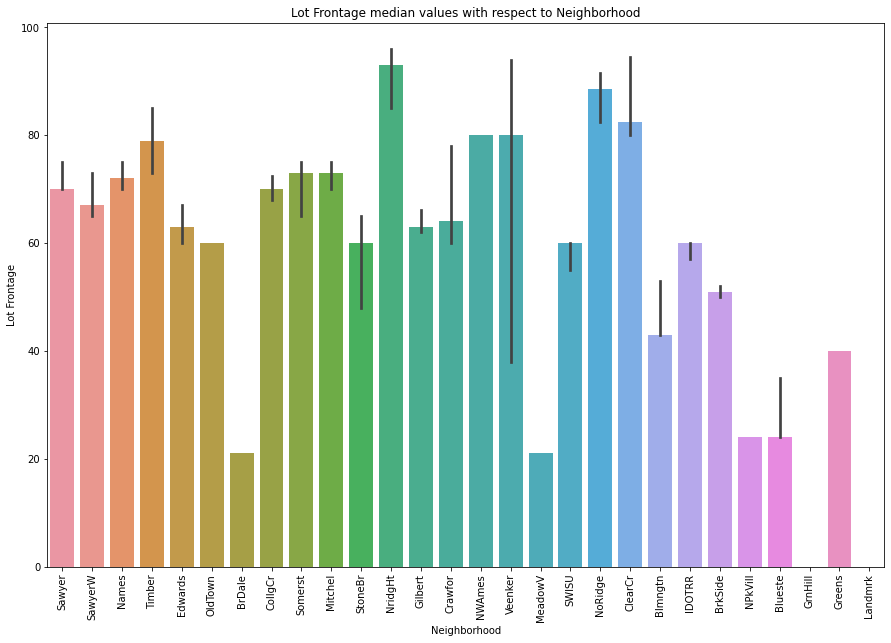

In [25]:
# Barplot of the Lot Frontage median values with respect to Neighborhood
from numpy import median
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
plt.title('Lot Frontage median values with respect to Neighborhood')
sns.barplot( x = 'Neighborhood', y = 'Lot Frontage', data = train, estimator = median);

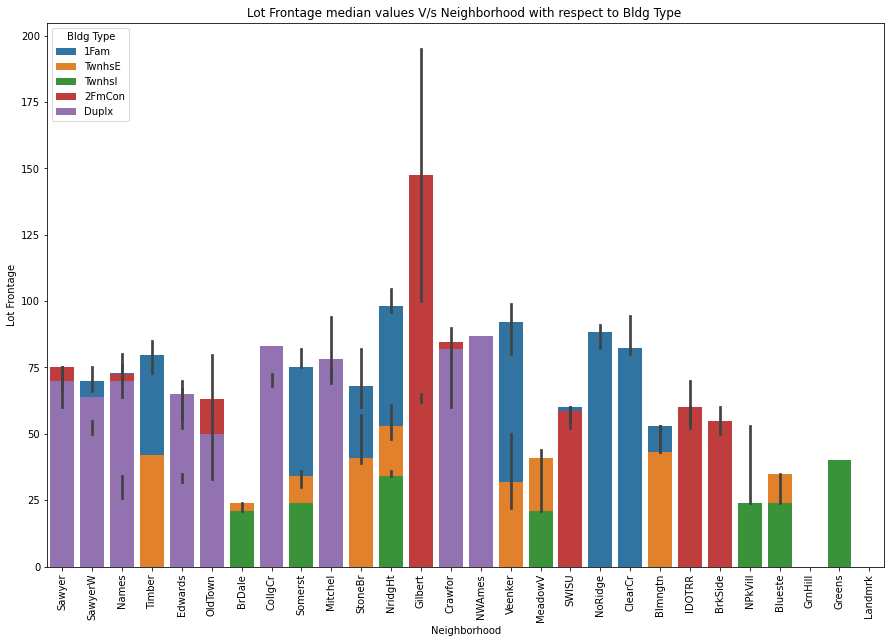

In [26]:
from numpy import median
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
plt.title('Lot Frontage median values V/s Neighborhood with respect to Bldg Type ')
sns.barplot( x = 'Neighborhood', y = 'Lot Frontage', hue = 'Bldg Type', 
            data = train, estimator = median, dodge = False);

In [27]:
# Fill the median values for the missing Lot Frontages
train['Lot Frontage'] = train.groupby('Neighborhood')['Lot Frontage'].apply(lambda x: x.fillna(x.median()))
train.groupby('Neighborhood')['Lot Frontage'].median()


Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    82.5
CollgCr    70.0
Crawfor    64.0
Edwards    63.0
Gilbert    63.0
Greens     40.0
GrnHill     NaN
IDOTRR     60.0
Landmrk     NaN
MeadowV    21.0
Mitchel    73.0
NPkVill    24.0
NWAmes     80.0
Names      72.0
NoRidge    88.5
NridgHt    93.0
OldTown    60.0
SWISU      60.0
Sawyer     70.0
SawyerW    67.0
Somerst    73.0
StoneBr    60.0
Timber     79.0
Veenker    80.0
Name: Lot Frontage, dtype: float64

In [28]:
train[train['Lot Frontage'].isnull()]
# We still ahve 3 Null values, lets investigate them
train['Lot Frontage'].isnull().sum()

3

In [29]:
train.loc[train['Lot Frontage'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
463,2257,916253320,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,0,9,2007,WD,330000
1121,2789,907230240,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,TwnhsI,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,NaN,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,MnPrv,0,6,2006,WD,137000
1211,2893,916252170,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,NaN,0,11,2006,WD,230000


Lot Frontage is NaN corresponding to GrnHill and Landmark Neighborhoods, we will fill them with the Lot Frontage median values corresponding to the Bldg Types, here it is TwnhsE and TwnhsI

<AxesSubplot:xlabel='Bldg Type', ylabel='Lot Frontage'>

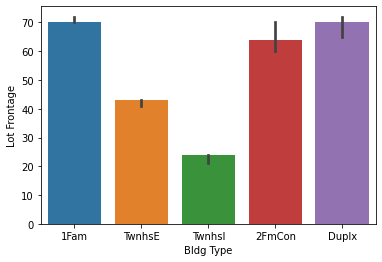

In [30]:
sns.barplot(x = 'Bldg Type', y = 'Lot Frontage', estimator = median, data = train)


In [31]:
train.groupby('Bldg Type')['Lot Frontage'].median()

Bldg Type
1Fam      70.0
2FmCon    64.0
Duplx     70.0
TwnhsE    43.0
TwnhsI    24.0
Name: Lot Frontage, dtype: float64

In [32]:
train['Lot Frontage'] = train.groupby('Bldg Type')['Lot Frontage'].apply(lambda x: x.fillna(x.median()))


In [33]:
train['Lot Frontage'].isnull().sum()

0

### Investigating and Filling Missing Null Values in Mas Vnr Type(Masonry Veneer type) and Mas Vnr Area(Masonry Veneer Area)

In [34]:
print('Null in Mas Vnr Type:',train['Mas Vnr Type'].isnull().sum())
print('Null in Mas Vnr Area:',train['Mas Vnr Area'].isnull().sum())

Null in Mas Vnr Type: 22
Null in Mas Vnr Area: 22


In [35]:
train[train['Mas Vnr Area']==0][['Mas Vnr Type', 'Mas Vnr Area']].head(2)

,Mas Vnr Type,Mas Vnr Area
2,None,0.0
3,None,0.0


In [36]:
train['Mas Vnr Area'].value_counts()

0.0       1194
120.0       11
200.0       10
176.0       10
72.0         9
          ... 
224.0        1
738.0        1
1095.0       1
479.0        1
436.0        1
Name: Mas Vnr Area, Length: 373, dtype: int64

In [37]:
train['Mas Vnr Type'].value_counts()

None       1196
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

The 22 Null values in Mas Vnr Area and Mas Vnr Type match up. Hence we can fill None and 0 for the nulls

In [38]:
train['Mas Vnr Type'] = train['Mas Vnr Type'].fillna('None')
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(0)




### Investigating and Filling Missing values in the Basement columns

In [39]:
# Select only columns related to Basement
bsmt_cols = [col for col in train.columns if 'Bsmt' in col]
bsmt_df = train[bsmt_cols]

In [40]:
bsmt_df[bsmt_df['Total Bsmt SF'].isnull()]


,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# there is asingle row that contains NaN values
# We can fill 0 in the BsmtFin SF 1, BsmtFin SF 2 , Bsmt Unf SF and Total Bsmt SF

train['BsmtFin SF 1'] = train['BsmtFin SF 1'].fillna(0)
train['BsmtFin SF 2'] = train['BsmtFin SF 2'].fillna(0)
train['Bsmt Unf SF'] = train['Bsmt Unf SF'].fillna(0)
train['Total Bsmt SF'] = train['Total Bsmt SF'].fillna(0)

In [42]:
# Looking at the null values in Bsmt Full Bath and Bsmt Half Bath there are 2
bsmt_df[bsmt_df['Bsmt Full Bath'].isnull()]


,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# NaN corresponds to no basement, hence we can fill 0 for the Bsmt Full Bath and Bsmt Half Bath
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].fillna(0)
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].fillna(0)

#### Missing values in Bsmt Qual and Bsmt Cond

In [44]:
#  Checking to see if the 51 Null values corresponds to the same rows
train[train['Bsmt Qual'].isnull()].index

Int64Index([  12,   93,  114,  146,  240,  249,  256,  390,  437,  485,  499,
             514,  580,  616,  642,  696,  700,  737,  772,  790,  794,  924,
             933,  954, 1007, 1022, 1049, 1089, 1098, 1125, 1157, 1211, 1222,
            1252, 1256, 1270, 1327, 1331, 1377, 1387, 1428, 1481, 1594, 1620,
            1681, 1684, 1686, 1859, 1875, 1889, 1933],
           dtype='int64')

In [45]:
# Do the Total Bsmt SF ==0 correspond to the 51 Null values in the Bsmt Qual and Bsmt Cond
train[train['Total Bsmt SF']==0].index

Int64Index([  12,   93,  114,  146,  240,  249,  256,  390,  437,  485,  499,
             514,  580,  616,  642,  696,  700,  737,  772,  790,  794,  924,
             933,  954, 1007, 1022, 1049, 1089, 1098, 1125, 1157, 1211, 1222,
            1252, 1256, 1270, 1327, 1331, 1377, 1387, 1428, 1481, 1594, 1620,
            1681, 1684, 1686, 1859, 1875, 1889, 1933],
           dtype='int64')

In [46]:
train[train['Total Bsmt SF']==0].index == train[train['Bsmt Qual'].isnull()].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

We can see that the NAN Values corresponding to the Bsmt Qual and Bsmt Cond are because the Total Bsmt SF =0. We can fill these missing values with NA, which means 'No Basement' from the data dictionary

In [47]:
train['Bsmt Qual'] = train['Bsmt Qual'].fillna('NA')
train['Bsmt Cond'] = train['Bsmt Cond'].fillna('NA')

In [48]:
#  Checking to see if the 51 Null values corresponds to the same rows
train[train['BsmtFin Type 1'].isnull()].index

Int64Index([  12,   93,  114,  146,  240,  249,  256,  390,  437,  485,  499,
             514,  580,  616,  642,  696,  700,  737,  772,  790,  794,  924,
             933,  954, 1007, 1022, 1049, 1089, 1098, 1125, 1157, 1211, 1222,
            1252, 1256, 1270, 1327, 1331, 1377, 1387, 1428, 1481, 1594, 1620,
            1681, 1684, 1686, 1859, 1875, 1889, 1933],
           dtype='int64')

In [49]:
train[train['Total Bsmt SF']== 0].index

Int64Index([  12,   93,  114,  146,  240,  249,  256,  390,  437,  485,  499,
             514,  580,  616,  642,  696,  700,  737,  772,  790,  794,  924,
             933,  954, 1007, 1022, 1049, 1089, 1098, 1125, 1157, 1211, 1222,
            1252, 1256, 1270, 1327, 1331, 1377, 1387, 1428, 1481, 1594, 1620,
            1681, 1684, 1686, 1859, 1875, 1889, 1933],
           dtype='int64')

In [50]:
train[train['BsmtFin Type 1'].isnull()].index  == train[train['Total Bsmt SF']== 0].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [51]:
train[train['BsmtFin Type 2'].isnull()].index

Int64Index([  12,   93,  114,  146,  240,  249,  256,  390,  437,  485,  499,
             514,  580,  616,  642,  696,  700,  737,  772,  790,  794,  924,
             933,  954, 1007, 1022, 1049, 1089, 1098, 1125, 1147, 1157, 1211,
            1222, 1252, 1256, 1270, 1327, 1331, 1377, 1387, 1428, 1481, 1594,
            1620, 1681, 1684, 1686, 1859, 1875, 1889, 1933],
           dtype='int64')

#### Comparing the 2 index outputs for BsmtFin Type 2 and Total Bsmt SF, there is a an additional row (no. 1147). Lets look at that row.

In [52]:
train.loc[[1147]][[col for col in train.columns if 'Bsmt' in col]]


,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


We can see here that the BsmtFin SF 2 = 479.0 and BsmtFin Type 2 is NaN, we can assum that the value entered is by mistake and we can impute a value for the BsmtFin Type 2 in row 1147 by looking at the other other values in the same range

In [53]:
# Looking for highest value counts for the BsmtFin Type 2 sorted by BsmtFin SF 2 >470
train[train['BsmtFin SF 2']>470.0]['BsmtFin Type 2'].value_counts()

Rec    23
ALQ    21
GLQ    18
LwQ    14
BLQ    12
Name: BsmtFin Type 2, dtype: int64

In [54]:
#  Fill the Nan value in row 1147 with 'Rec'
train['BsmtFin Type 2'][1147] = 'Rec'


In [55]:
train[train['BsmtFin Type 2'].isnull()].index  == train[train['Total Bsmt SF']== 0].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [56]:
# No we can see that the BsmtFin Type 1 and BsmtFin Type 2 match the rows where Total Bsmt SF = 0, We can fill 'NA'

train['BsmtFin Type 1'] = train['BsmtFin Type 1'].fillna('NA')
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].fillna('NA')

### Missing values in Bsmt Exposure

In [57]:
train['Bsmt Exposure'].value_counts()

No    1325
Av     286
Gd     203
Mn     161
Name: Bsmt Exposure, dtype: int64

In [58]:
train[(train['Bsmt Exposure'].isnull()) & (train['Total Bsmt SF']> 0)][[col for col in train.columns if 'Bsmt' in col]]
# We can see here that the Bsmt Exposure is NaN while the Total Bsmt SF >0, 
# we can fill 'NO' looking at the value counts

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


In [59]:
train['Bsmt Exposure'][1456] = 'No'
train['Bsmt Exposure'][1547] = 'No'
train['Bsmt Exposure'][1997] = 'No'

In [60]:
# Chevking to see if the null values in Bsmt Exposure corresponds to Total Bsmt SF' = 0
train[train['Total Bsmt SF'] == 0].index == train[train['Bsmt Exposure'].isnull()].index


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [61]:
# We can fill, 'NA' for 'No Basement' in the NaN for Bsmt Exposure.

train['Bsmt Exposure'] = train['Bsmt Exposure'].fillna('NA')


### Missing values in Fireplace Qu

In [62]:
train[train['Fireplace Qu'].isnull()].index == train[train['Fireplaces'] == 0].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [63]:
#  we can see that the null values in the Fireplace Qu corresponds to Fireplaces = 0
#  Hence we can fill the NaN values in Fireplace Qu to NA
train['Fireplace Qu'] = train['Fireplace Qu'].fillna('NA')


### Missing values in Garage related columns

In [64]:
train['Garage Area'].value_counts()

0.0      105
440.0     70
576.0     69
484.0     52
240.0     45
        ... 
224.0      1
959.0      1
375.0      1
890.0      1
485.0      1
Name: Garage Area, Length: 513, dtype: int64

In [65]:
train[train['Garage Type'].isnull()].index == train[train['Garage Area']==0].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [66]:
#  we can see that the null values in the Garage Type corresponds to Garage Area = 0
#  Hence we can fill the NaN values in Garage Type to NA

train['Garage Type'] = train['Garage Type'].fillna('NA')

In [67]:
train[train['Garage Yr Blt'].isnull()].index 

Int64Index([  53,   65,   79,  101,  114,  120,  134,  136,  139,  162,
            ...
            1814, 1841, 1893, 1927, 1952, 1982, 1991, 2027, 2039, 2042],
           dtype='int64', length=106)

In [68]:
train[train['Garage Area']==0].index

Int64Index([  53,   65,   79,  101,  114,  120,  134,  136,  139,  162,
            ...
            1814, 1841, 1893, 1927, 1952, 1982, 1991, 2027, 2039, 2042],
           dtype='int64', length=105)

In [69]:
# Looking for the rows that are uncommom in the Garage Yr Built and Garage area
list1 = train[train['Garage Yr Blt'].isnull()].index 
list2 = train[train['Garage Area']==0].index
list_difference = [item for item in list1 if item not in list2]

print(list_difference)

[1712]


In [70]:
# Lets investigate row 1712
train.loc[[1712]][[col for col in train.columns if 'Garage' in col]]




,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# We can change the Garage type for the row 1712 to NA
train['Garage Type'][1712] = 'NA'

In [72]:
train[train['Garage Area']==0][[col for col in train.columns if 'Garage' in col]]




,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
53,NA,NaN,NaN,0.0,0.0,NaN,NaN
65,NA,NaN,NaN,0.0,0.0,NaN,NaN
79,NA,NaN,NaN,0.0,0.0,NaN,NaN
101,NA,NaN,NaN,0.0,0.0,NaN,NaN
114,NA,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...
1982,NA,NaN,NaN,0.0,0.0,NaN,NaN
1991,NA,NaN,NaN,0.0,0.0,NaN,NaN
2027,NA,NaN,NaN,0.0,0.0,NaN,NaN
2039,NA,NaN,NaN,0.0,0.0,NaN,NaN


In [73]:
# We can fill NA to the Garage columns corresponding the the Garage Area = 0
train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(0)
train['Garage Finish'] = train['Garage Finish'].fillna('NA')
train['Garage Qual'] = train['Garage Qual'].fillna('NA')
train['Garage Cond'] = train['Garage Cond'].fillna('NA')



In [74]:
# Check for null 
# list_null = train.isnull().sum()
# list_null[list_null>0]

### Missing values in Garage Cars and Garage Area 

In [75]:
train[train['Garage Cars'].isnull()][[col for col in train.columns if 'Garage' in col]]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,NA,0.0,NA,NaN,NaN,NA,NA


In [76]:
#  looking the row 1712 we can fill the NAN values as 0 as the garage type is changed from Detached to NA
train['Garage Cars'] = train['Garage Cars'].fillna(0)
train['Garage Area'] = train['Garage Area'].fillna(0)

#### Missing Values in Fence column

In [77]:
train['Fence'] = train['Fence'].fillna('NA')


#### Rechecking for Null values

In [80]:
train.isnull().sum().sum()
# there are no more Null values in the train dataset

0

***

### Feature Engineering

#### Converting the Ordinal values to numerical
The Overall Qual and Overall Cond columns are already numerical, we can convert the other ordinal columns

In [81]:
#List of ordinal columns minus the Overall Qual and Overall Cond
ord_cols = ['Lot Shape', 'Utilities', 'Land Slope','Exter Qual',
            'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
            'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC',
            'Electrical', 'Kitchen Qual','Functional', 
            'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
            'Garage Cond', 'Paved Drive', 'Fence']
len(ord_cols)

20

In [82]:
ord_df = train[ord_cols]
for col in ord_df:
    print (col +':' ,train[col].unique())


Lot Shape: ['IR1' 'Reg' 'IR2' 'IR3']
Utilities: ['AllPub' 'NoSeWa']
Land Slope: ['Gtl' 'Sev' 'Mod']
Exter Qual: ['Gd' 'TA' 'Ex' 'Fa']
Exter Cond: ['TA' 'Gd' 'Fa' 'Ex' 'Po']
Bsmt Qual: ['TA' 'Gd' 'Fa' 'NA' 'Ex']
Bsmt Cond: ['TA' 'Gd' 'NA' 'Fa' 'Po' 'Ex']
Bsmt Exposure: ['No' 'Gd' 'Av' 'NA' 'Mn']
BsmtFin Type 1: ['GLQ' 'Unf' 'ALQ' 'Rec' 'NA' 'BLQ' 'LwQ']
BsmtFin Type 2: ['Unf' 'Rec' 'NA' 'BLQ' 'GLQ' 'LwQ' 'ALQ']
Heating QC: ['Ex' 'TA' 'Gd' 'Fa' 'Po']
Electrical: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
Kitchen Qual: ['Gd' 'TA' 'Fa' 'Ex']
Functional: ['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Maj2' 'Sal']
Fireplace Qu: ['NA' 'TA' 'Gd' 'Po' 'Ex' 'Fa']
Garage Finish: ['RFn' 'Unf' 'Fin' 'NA']
Garage Qual: ['TA' 'Fa' 'NA' 'Gd' 'Ex' 'Po']
Garage Cond: ['TA' 'Fa' 'NA' 'Gd' 'Ex' 'Po']
Paved Drive: ['Y' 'N' 'P']
Fence: ['NA' 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


In [83]:
# Dictionary of Ordinal values to change to numerical
ord_dict = [{'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1},
            {'AllPub':1, 'NoSeWa':0},
            {'Gtl':3, 'Mod':2,'Sev':1 }, 
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}, 
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
            {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0},
            {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
            {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
            {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
            {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
            {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
            {'Y':3, 'P':2, 'N':1},
            {'GdPrv':4,'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}]



In [84]:
# Function to convert the Ordinal to Numerical values in the train dataset
def ordinal_to_num(df,columns, values):
    for i in range(20):
        df[columns[i]].replace(values[i], inplace = True)
    return None
        
ordinal_to_num(train,ord_cols, ord_dict)        

In [85]:
t_object = train.dtypes
t_object_filtered = t_object[t_object == 'object']
print(t_object_filtered)

MS Zoning       object
Street          object
Land Contour    object
Lot Config      object
Neighborhood    object
Condition 1     object
Condition 2     object
Bldg Type       object
House Style     object
Roof Style      object
Roof Matl       object
Exterior 1st    object
Exterior 2nd    object
Mas Vnr Type    object
Foundation      object
Heating         object
Central Air     object
Garage Type     object
Sale Type       object
dtype: object


###  Important Distibutions and Correlations

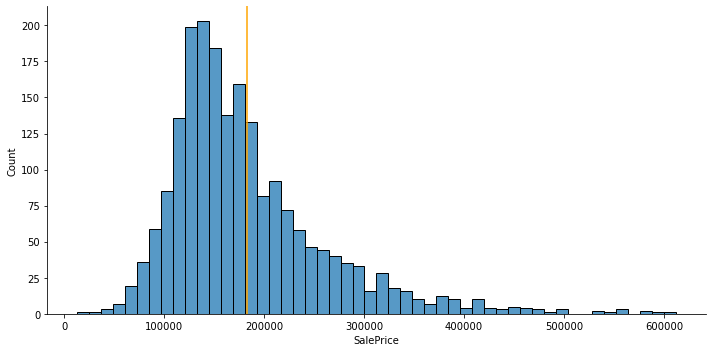

In [86]:
#  Histogram of home saleprices for the listings in the dataset

sns.displot(data=train,x="SalePrice", bins=50, aspect=10/5);

plt.axvline(np.mean(train['SalePrice']), color='orange');


#### The distribution of the Target column is right skewed. we can consider taking the log of the sale price column for modeling

### Correlations between SaplePrice and Non- Categorical Variables

In [87]:
train_correlation = train.corr()
train_correlation

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175399,0.023751,-0.030065,0.031479,-0.014256,0.013608,-0.017098,-0.056345,-0.024788,-0.065503,-0.090174,-0.034662,-0.072689,-0.014823,-0.039539,0.017782,0.058714,-0.067752,-0.046260,-0.008722,0.001515,0.012749,-0.034446,-0.025600,-0.054664,-0.022327,-0.008586,0.015569,-0.023489,-0.034000,0.015176,-0.058042,-0.043891,0.009195,-0.008021,-0.065485,-0.011049,-0.012308,-0.035588,-0.023586,-0.030257,-0.059991,-0.043614,-0.041574,-0.037272,-0.035650,-0.065445,-0.006954,0.003389,0.037628,-0.024300,0.010595,0.056299,-0.012324,-0.012483,0.123579,-0.975830,-0.050397
PID,0.175399,1.000000,-0.002167,-0.096320,0.023850,0.087565,-0.024111,-0.112978,-0.252082,0.114341,-0.336673,-0.165683,-0.237898,-0.217038,0.055328,-0.187978,-0.099460,0.007811,-0.102848,-0.080137,-0.016692,-0.010057,-0.109102,-0.194944,-0.092613,-0.138695,-0.139015,-0.001759,0.070435,-0.104760,-0.024301,0.000661,-0.170695,-0.159207,0.016478,0.066899,-0.186130,-0.079508,-0.095750,-0.111408,-0.155134,-0.143481,-0.267014,-0.219292,-0.192901,-0.164956,-0.158644,-0.215296,-0.034741,-0.085039,0.142545,-0.025495,-0.039020,0.006582,0.093864,0.005224,-0.036313,0.008269,-0.243856
MS SubClass,0.023751,-0.002167,1.000000,-0.379313,-0.245846,0.076898,0.019246,0.039085,0.029464,-0.075486,0.036185,0.040822,-0.003602,0.016935,-0.065343,0.051550,-0.028537,0.053274,0.061713,-0.060587,-0.038399,-0.069017,-0.145379,-0.232726,-0.024901,-0.004357,-0.251164,0.302730,0.032751,0.062445,0.026446,-0.017508,0.136189,0.181132,-0.012031,0.241427,-0.022003,0.026004,-0.003421,-0.057071,-0.059799,-0.106837,-0.032111,-0.047615,-0.107334,-0.094167,-0.113154,-0.028365,0.001306,-0.016634,-0.039969,-0.029452,-0.039501,-0.004706,-0.092679,-0.027753,0.012434,-0.029893,-0.092977
Lot Frontage,-0.030065,-0.096320,-0.379313,1.000000,0.411971,-0.122333,-0.010072,-0.066338,0.198144,-0.036931,0.111528,0.083899,0.218259,0.148402,-0.010288,0.106066,0.020957,0.182475,0.055077,0.212668,0.013662,0.041405,0.119263,0.353311,0.085304,0.063532,0.441747,0.021107,-0.009798,0.367592,0.113614,-0.021791,0.147805,0.036228,0.212913,0.015244,0.175754,0.347445,-0.012922,0.237310,0.220479,0.097016,0.197165,0.295979,0.359391,0.110573,0.103107,0.049607,0.112374,0.184139,-0.005235,0.031186,0.075888,0.136251,0.011838,0.048741,-0.017870,0.013782,0.342546
Lot Area,0.031479,0.023850,-0.245846,0.411971,1.000000,-0.304295,-0.014184,-0.308720,0.114390,-0.014840,0.035598,0.053814,0.168678,0.092096,0.027314,0.071217,0.002540,0.200341,0.046207,0.218907,0.024068,0.042090,0.045327,0.286406,0.024687,0.046805,0.382854,0.031145,0.002542,0.330665,0.115111,0.029375,0.127682,0.047418,0.140996,-0.012596,0.121068,0.242195,-0.077703,0.292303,0.203637,0.085445,0.125872,0.218099,0.266923,0.103129,0.091472,0.002916,0.156549,0.148499,0.014112,0.020715,0.068116,0.115577,-0.032850,0.094335,0.006720,-0.028317,0.302164
Lot Shape,-0.014256,0.087565,0.076898,-0.122333,-0.304295,1.000000,0.023150,0.113275,-0.243110,0.079342,-0.272456,-0.215105,-0.124526,-0.234265,0.012121,-0.226890,-0.078715,-0.179557,-0.149630,-0.179206,-0.026779,-0.032141,-0.008070,-0.204704,-0.155207,-0.111643,-0.218063,-0.068616,0.021699,-0.229457,-0.083503,-0.044463,-0.193634,-0.133634,-0.019852,0.091909,-0.198503,-0.130316,-0.018184,-0.194856,-0.186367,-0.123001,-0.272189,-0.225393,-0.212762,-0.140699,-0.127

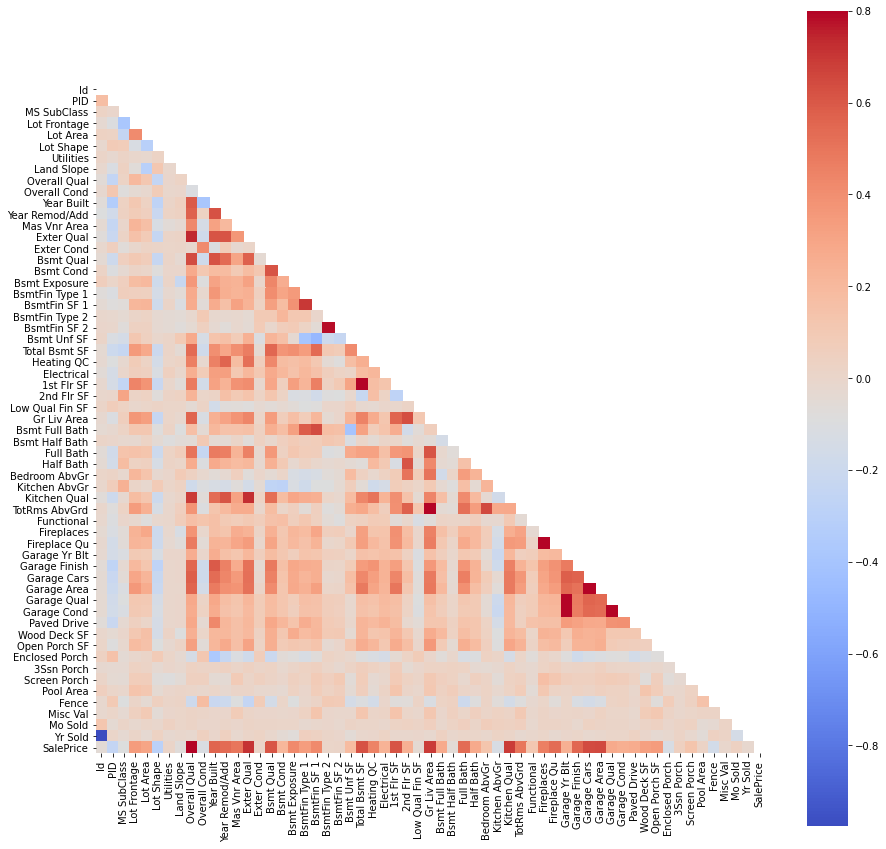

In [88]:
# Heatmap to show the above correlation
f, ax = plt.subplots(figsize=(15, 15)) 
mask = np.zeros_like(train_correlation)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(train_correlation, mask=mask,  vmax=.8, square=True, cmap='coolwarm')


In [89]:
train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False)


,SalePrice
SalePrice,1.000000
Overall Qual,0.797463
Exter Qual,0.709869
Gr Liv Area,0.694956
Kitchen Qual,0.689562
Garage Area,0.648170
Garage Cars,0.645071
Total Bsmt SF,0.624187
1st Flr SF,0.616066
Bsmt Qual,0.608673


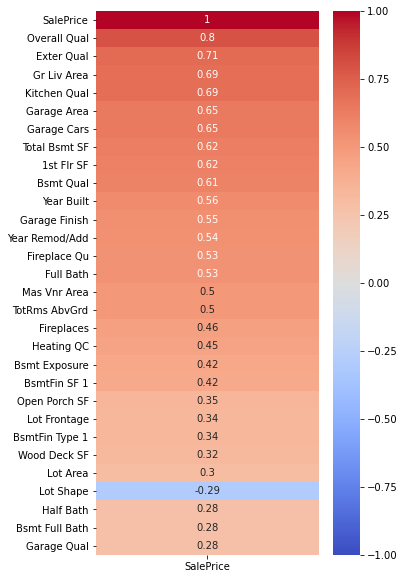

In [90]:
plt.figure(figsize = (5,10))

sns.heatmap(train.corr()[['SalePrice']].sort_values(by='SalePrice', key=np.abs, ascending = False)[:30], 
            vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True);


In [92]:
train[train.columns[: -1]]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type
0,109,533352170,60,RL,70.0,13517,Pave,3,Lvl,1,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,0,0,3,2010,WD
1,544,531379050,60,RL,43.0,11492,Pave,3,Lvl,1,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,0,0,4,2009,WD
2,153,535304180,20,RL,68.0,7922,Pave,4,Lvl,1,Inside,3,Names,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,0,0,1,2010,WD
3,318,916386060,60,RL,73.0,9802,Pave,4,Lvl,1,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,0,0,4,2010,WD
4,255,906425045,50,RL,82.0,14235,Pave,3,Lvl,1,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,0,0,3,2010,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,3,HLS,1,Inside,3,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,3,6,1011.0,1,0.0,873.0,1884.0,GasA,5,Y,5,1728,0,0,1728,1.0,0.0,2,0,3,1,4,7,7,1,4,Attchd,2007.0,3,2.0,520.0,3,3,3,0,276,0,0,0,0,0,0,1,2008,WD
2047,785,905377130,30,RL,63.0,12342,Pave,3,Lvl,1,Inside,3,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,4,262.0,1,0.0,599.0,861.0,GasA,5,Y,5,861,0,0,861,0.0,0.0,1,0,1,1,3,4,7,0,0,Detchd,1961.0,1,2.0,539.0,3,3,3,158,0,0,0,0,0,0,0,3,2009,WD
2048,916,909253010,50,RL,57.0,7558,Pave,4,Bnk,1,Inside,3,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,3,3,BrkTil,3,3,1,1,0.0,1,0.0,896.0,896.0,GasA,4,Y,5,1172,741,0,1913,0.0,0.0,1,1,3,1,3,9,7,1,3,Detchd,1929.0,1,2.0,342.0,2,2,3,0,0,0,0,0,0,0,0,3,2009,WD
2049,639,535179160,20,RL,80.0,10400,Pave,4,Lvl,1,Corner,3,Names,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,3,3,1,3,155.0,2,750.0,295.0,1200.0,GasA,3,Y,5,1200,0,0,1200,1.0,0.0,1,0,3,1,3,6,7,2,4,Attchd,1956.0,1,1.0,294.0,3,3,3,0,189,140,0,0,0,0,0,11,2009,WD


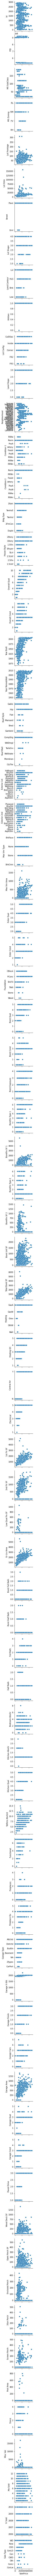

In [93]:
# sns pairplots for all the variables with the dependent salesprice variable.
# looking at the relationship of the variables and for any outliers if any

sns.pairplot(train, x_vars=['SalePrice'], y_vars = train[train.columns[: -1]])


### Garage Year Built outliers

<AxesSubplot:xlabel='SalePrice', ylabel='Garage Yr Blt'>

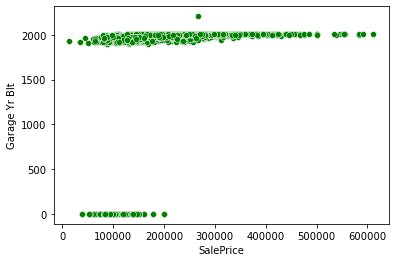

In [94]:
#  Looking at the Garage year built scatter plot
sns.scatterplot(data=train, x ="SalePrice", y="Garage Yr Blt", color = 'g')



Interpretation: We can see here that the column Garage Yr Blt,  has an outlier. we need to see what that is and delete it. This data consists of homes sold in Ames, Iowa between 2006 and 2010 we can eleminate any value above 2010

In [95]:
train[train['Garage Yr Blt']> 2010]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1699,2261,916384070,20,RL,68.0,8298,Pave,3,HLS,1,Inside,3,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,3,6,583.0,1,0.0,963.0,1546.0,GasA,5,Y,5,1564,0,0,1564,0.0,0.0,2,0,2,1,5,6,7,1,4,Attchd,2207.0,2,2.0,502.0,3,3,3,132,0,0,0,0,0,0,0,9,2007,New,267300


In [96]:
train['Garage Yr Blt'][1699]

2207.0

In [97]:
#  There is an outlier (year = 2207) which is entered wrong. hence we'll change the value to 2007
train.loc[1699, 'Garage Yr Blt'] = 2007
train.loc[1699, 'Garage Yr Blt']

2007.0

<AxesSubplot:xlabel='SalePrice', ylabel='Garage Yr Blt'>

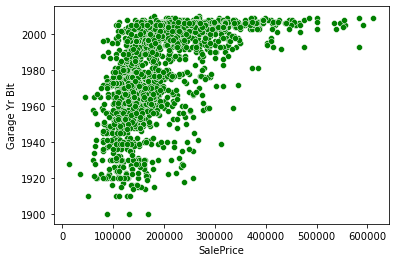

In [98]:
#  plot of Garage Yr Blt Vs SalePrice to check if the oulier has been corrected
garage_yr = train[train['Garage Yr Blt'] != 0]

sns.scatterplot(data=garage_yr, x ="SalePrice", y="Garage Yr Blt", color = 'g')


### Lot frontage and SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Lot Frontage'>

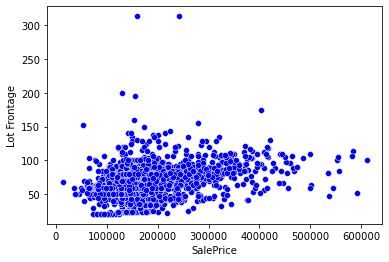

In [99]:
# Lot frontage and SalePrice
# from the plot we can see that there are some ouliers with high Lot Frontage and low Sale price
#  generally if a lot frontage is high then the saleprice should be high as well

sns.scatterplot(data=train, x ="SalePrice", y="Lot Frontage", color = 'b')


In [100]:
# The Column 'Street' has houses with paved street access. more than 99% of the houses have paved. 
# We can drop these from the model
train.Street.value_counts(normalize = True)

Pave    0.998521
Grvl    0.001479
Name: Street, dtype: float64

In [101]:
# The column 'Land Contour' has more than 89% Lvl (Near flat level) 
# We can drop these from the model as well

train['Lot Shape'].value_counts(normalize = True)

4    0.627896
3    0.340562
2    0.027107
1    0.004436
Name: Lot Shape, dtype: float64

In [102]:
train['3Ssn Porch'].value_counts(normalize = True)

0      0.987679
153    0.001479
168    0.001479
144    0.000986
216    0.000493
407    0.000493
323    0.000493
304    0.000493
290    0.000493
255    0.000493
245    0.000493
224    0.000493
180    0.000493
182    0.000493
96     0.000493
176    0.000493
162    0.000493
150    0.000493
140    0.000493
120    0.000493
508    0.000493
Name: 3Ssn Porch, dtype: float64

In [103]:
train['Roof Style'].value_counts(normalize = True)

Gable      0.790044
Hip        0.193691
Flat       0.006407
Gambrel    0.005421
Mansard    0.002957
Shed       0.001479
Name: Roof Style, dtype: float64

Looking at the normalized value counts for the columns in the Train dataset, variables that contained over 88% of their points concentarted to a specifuc value can be considered to be dropped. For example the 3Ssn Porch (3season screen porch) represents the area in Sq Ft for each houses screen porch size. While 98% of homes in the dataset had 0 size porch, signifying that they did not have a porch. Hence dropping them would not have any variation in the model values. here are the columns that CAN be dropped from the model features:
- 3Ssn Porch
- Land Contour
- Street
- Roof Mtl
- Heating
- Central Air
- Utilities
- Land Slope
- Electrical
- Low Qual Fin SF
- Functional
- Kitchen AbvGr
- Garage Qual
- Garage Cond
- Screen Porch
- pool Area
- Misc Val

### Saving the cleaned train data in csv

In [104]:
train.to_csv('../datasets/clean_train.csv', index = False)


***

## Build an initial Linear model for non Categorical columns 

In [ ]:
train.shape

In [ ]:
test.columns

In [ ]:
test.shape

In [ ]:
# non categorical data 
# Source: https://stackoverflow.com/questions/12725417/drop-non-numeric-columns-from-a-pandas-dataframe

train_non_cat_cols = train._get_numeric_data()
test_non_cat_cols = test._get_numeric_data()

In [ ]:
train_non_cat_cols.head()

In [ ]:
# test_non_cat_cols.shape
train.shape

In [ ]:
# Checking for infinity values

ds = train_non_cat_cols.isin([np.inf, -np.inf])
# print(ds)

count = np.isinf(train_non_cat_cols).values.sum()
print("It contains " + str(count) + " infinite values")

print("printing column name where infinity is present")
col_name = train_non_cat_cols.columns.to_series()[np.isinf(train_non_cat_cols).any()]
print(col_name) 

In [ ]:
# checking for NaN values
# train_non_cat_cols.isnull().sum().sum()
train_non_cat_cols.fillna(0, inplace = True)
test_non_cat_cols.fillna(0, inplace = True)

In [ ]:
features = list(train_non_cat_cols.columns)
features.remove('SalePrice')

In [ ]:
X = train_non_cat_cols[features]
y = train_non_cat_cols['SalePrice']

## Fit our model on training set after creating holdout

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
model_1 = LinearRegression()


In [ ]:
model_1.fit(X_train, y_train)


In [ ]:
model_1.score(X_train, y_train), model_1.score(X_test, y_test)


## Predict on our test csv

In [ ]:
kaggle_preds = model_1.predict(test_non_cat_cols)
test_non_cat_cols.shape

In [ ]:
kaggle_preds.shape

In [ ]:
kaggle_output = {'Id':test['Id'], 'SalePrice':kaggle_preds}


In [ ]:
kaggle_output = pd.DataFrame(kaggle_output)


In [ ]:
kaggle_output.to_csv('./submission_model_1.csv', index = False) # Be sure to set index = False or kaggle will reject

fitted the model based on all the non-categorical columns with nulls set to 0
Kaggle RMSE score = 34789.69882

## Functions to Model and Predict

In [ ]:
def model_to_csv(filepath_name, model, x, y ):
    preds = model.predict(X)
    kaggle_output = {'Id':test['Id'], 'SalePrice':preds}
    kaggle_output = pd.DataFrame(kaggle_output)
    kaggle_output.to_csv(filepath_name, index = False)
    print('preds size same as kaggle data size =', preds.shape[0]==878)
    
    
    

In [ ]:
def regression_metrics(X,y):
    import sklearn.metrics as metrics
    import sklearn.linear_model as linear_model
    import pandas as pd
    
    linereg = LinearRegression()
    model = linereg.fit(X,y)
    y_hat = linereg.predict(X)
    
    print(f" Mean Absolute Error = {metrics.mean_absolute_error(y, y_hat)} ")
    print(f" Sum Squared Error = {metrics.mean_squared_error(y,y_hat)* y.shape[0]} ")
    print(f" Mean Squared Error = {metrics.mean_squared_error(y_true = y, y_pred = y_hat)} ")
    print(f" Root Mean Squared Error = {metrics.mean_squared_error(y_true=y, y_pred = y_hat, squared = False)} ")    


In [ ]:
regression_metrics(X_test,y_test)